11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.8530 - loss: 0.4828 - val_accuracy: 0.9761 - val_loss: 0.0803
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9793 - loss: 0.0645 - val_accuracy: 0.9854 - val_loss: 0.0467
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9880 - loss: 0.0364 - val_accuracy: 0.9872 - val_loss: 0.0459
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9883 - val_loss: 0.0379
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9845 - val_loss: 0.0559
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9928 - loss: 0.0218 - val_accuracy: 0.9881 - val_loss: 0.0446
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9947 - loss: 0.0155 - val_accuracy: 0.9852 - val_loss: 0.0496
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9958 - loss: 0.0125 - 

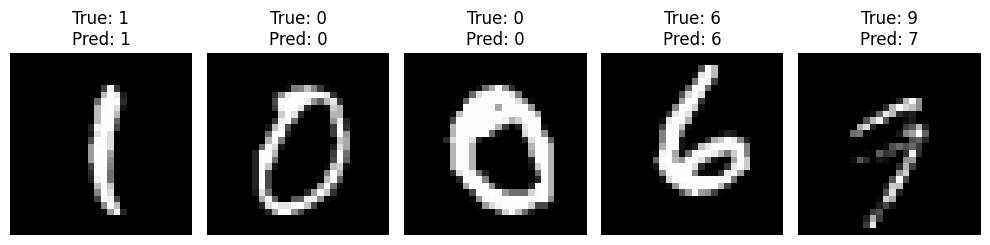

In [1]:
# Task: Build a CNN model to classify MNIST handwritten digits

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
# Reshape the data to add a channel dimension and normalize pixel values
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Ensure the accuracy is greater than 95%
if test_accuracy > 0.95:
    print("Achieved >95% test accuracy!")
else:
    print("Did not achieve >95% test accuracy.")

# Visualize predictions on 5 sample images
def visualize_predictions(model, X_test, y_test):
    plt.figure(figsize=(10, 5))
    sample_indices = np.random.choice(X_test.shape[0], 5, replace=False)
    sample_images = X_test[sample_indices]
    sample_labels = y_test[sample_indices]

    predictions = model.predict(sample_images)
    predicted_classes = np.argmax(predictions, axis=1)

    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {sample_labels[i]}\nPred: {predicted_classes[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_predictions(model, X_test, y_test)
